In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_car_price.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 1 missing value

In [4]:
#missing value
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
#Total missing value
data.isnull().sum().sum()

0

In [6]:
#missing value
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#Total missing value
data.isna().sum().sum()

0

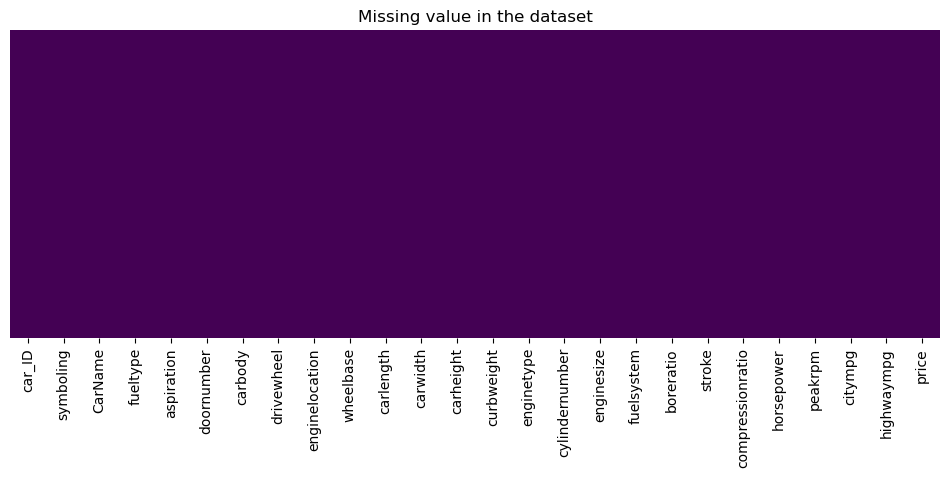

In [13]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

# 2 categorical value

In [34]:
df = pd.DataFrame({'col_name': data.columns, 'col_type': data.dtypes})
df.reset_index(drop=True, inplace=True)


In [35]:
df

,col_name,col_type
0,car_ID,int64
1,symboling,int64
2,CarName,object
3,fueltype,object
4,aspiration,object
5,doornumber,object
6,carbody,object
7,drivewheel,object
8,enginelocation,object
9,wheelbase,float64


In [37]:
df[df.col_type=='object']

,col_name,col_type
2,CarName,object
3,fueltype,object
4,aspiration,object
5,doornumber,object
6,carbody,object
7,drivewheel,object
8,enginelocation,object
14,enginetype,object
15,cylindernumber,object
17,fuelsystem,object


In [40]:
df['col_type'].value_counts()

object     10
int64       8
float64     8
Name: col_type, dtype: int64

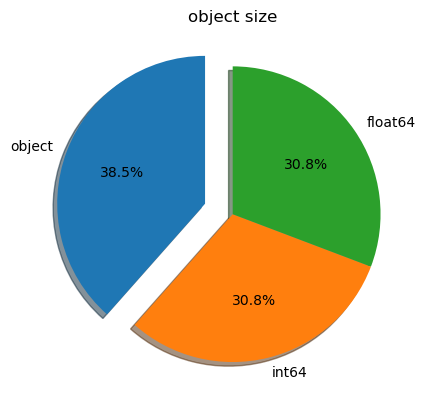

In [45]:
size = [10,8,8]
lab = ['object','int64','float64']
ex=[0.2,0,0]
plt.pie(size,explode=ex,labels=lab,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('object size')
plt.show()

# 3 quantile analyze

In [46]:
quantiles = data.quantile([0.25, 0.5, 0.75])
print(quantiles)

      car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0.25    52.0        0.0       94.5      166.3      64.1       52.0   
0.50   103.0        1.0       97.0      173.2      65.5       54.1   
0.75   154.0        2.0      102.4      183.1      66.9       55.5   

      curbweight  enginesize  boreratio  stroke  compressionratio  horsepower  \
0.25      2145.0        97.0       3.15    3.11               8.6        70.0   
0.50      2414.0       120.0       3.31    3.29               9.0        95.0   
0.75      2935.0       141.0       3.58    3.41               9.4       116.0   

      peakrpm  citympg  highwaympg    price  
0.25   4800.0     19.0        25.0   7788.0  
0.50   5200.0     24.0        30.0  10295.0  
0.75   5500.0     30.0        34.0  16503.0  


#  4 correlation 

In [48]:
corr_matrix = data.corr()
print(corr_matrix)

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

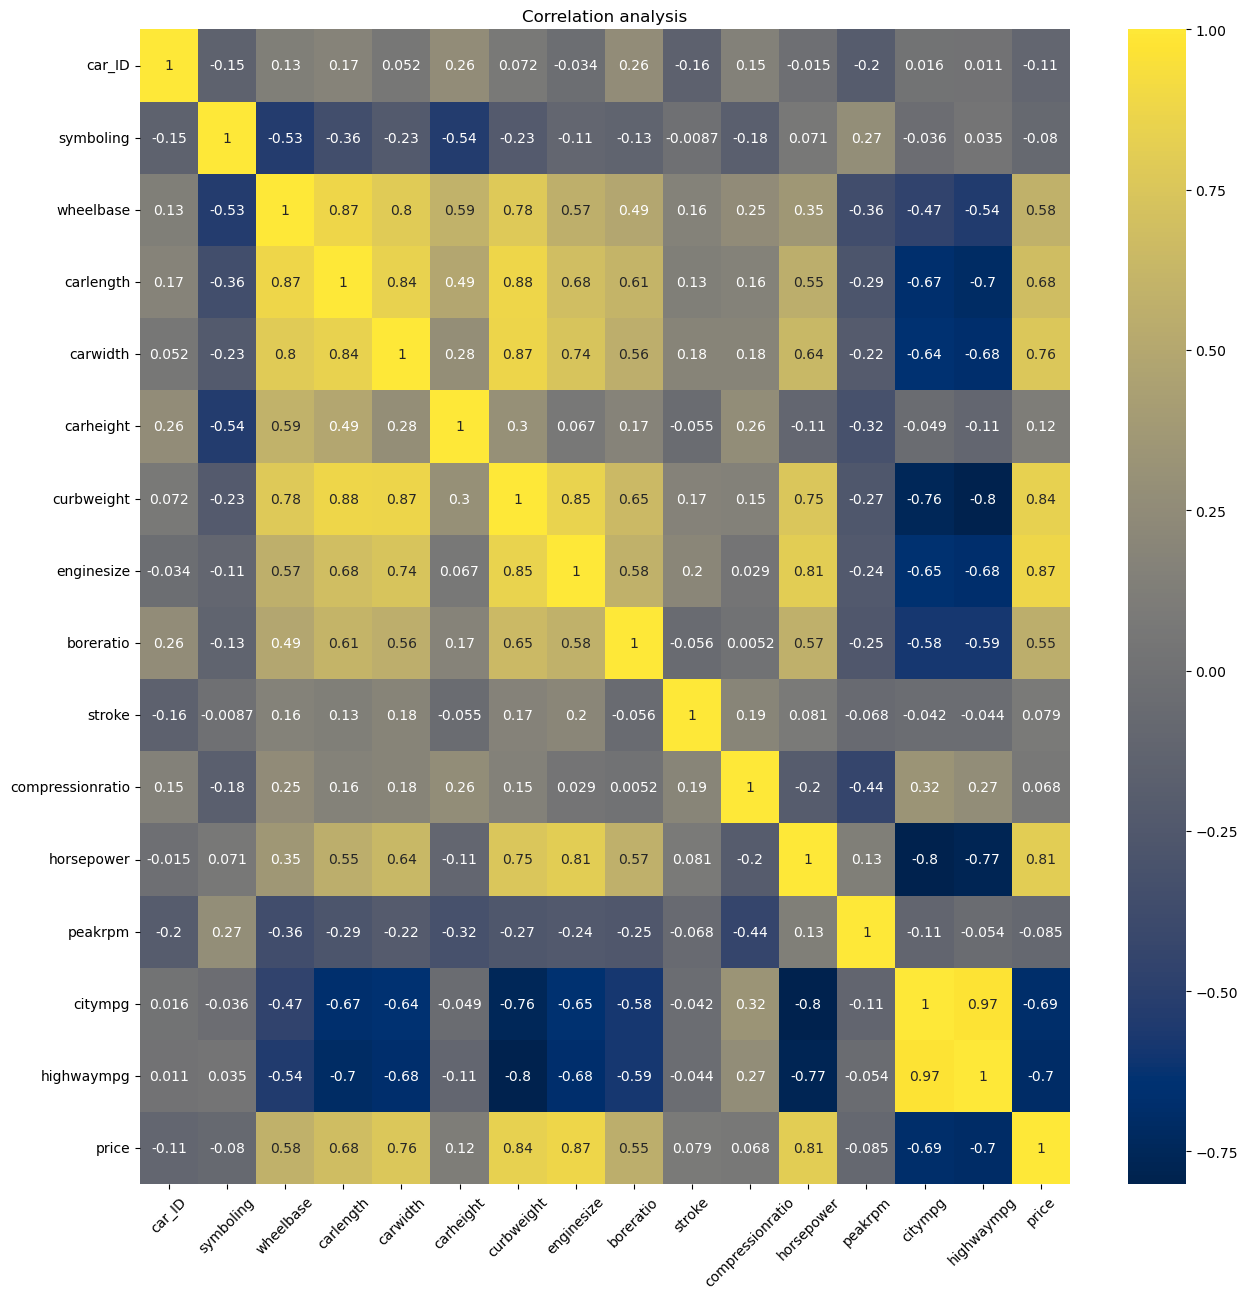

In [49]:
plt.figure(figsize=(15, 15))
sns.heatmap(data[data._get_numeric_data().columns].corr(), annot=True, cmap="cividis")
plt.xticks(rotation=45)
plt.title('Correlation analysis');

# 5 data vizualization

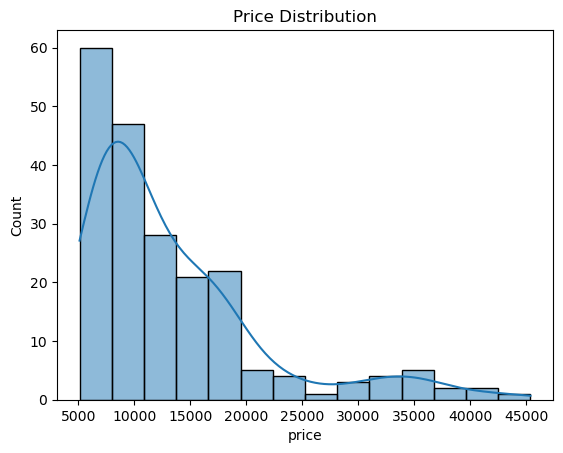

In [51]:
sns.histplot(data=data, x='price',kde=True,)
plt.title('Price Distribution');

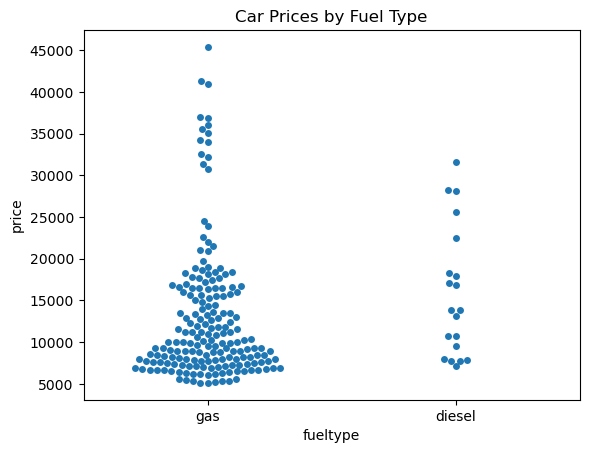

In [52]:
sns.swarmplot(x='fueltype', y='price', data=data)
plt.title('Car Prices by Fuel Type')
plt.show()

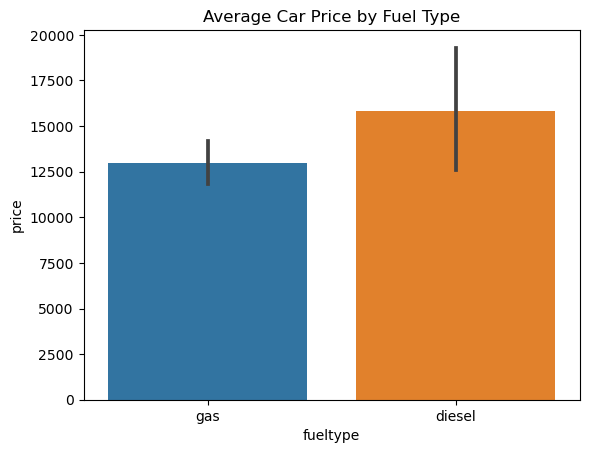

In [53]:
sns.barplot(x='fueltype', y='price', data=data, estimator=np.mean) 
plt.title('Average Car Price by Fuel Type')
plt.show()

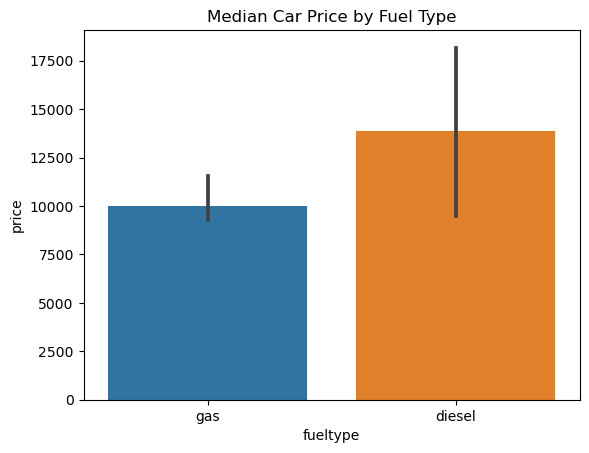

In [54]:
sns.barplot(x='fueltype', y='price', data=data, estimator=np.median) 
plt.title('Median Car Price by Fuel Type')
plt.show()

In [55]:
as_col = ['fueltype', 'aspiration', 'doornumber','carbody','drivewheel','enginelocation','enginetype',
                    'cylindernumber','fuelsystem','Brand']

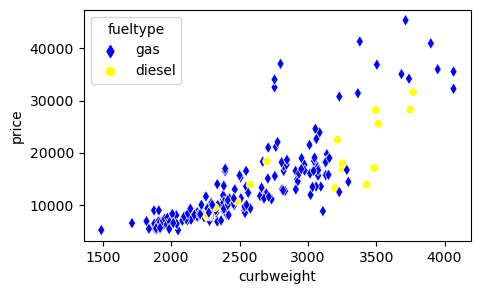

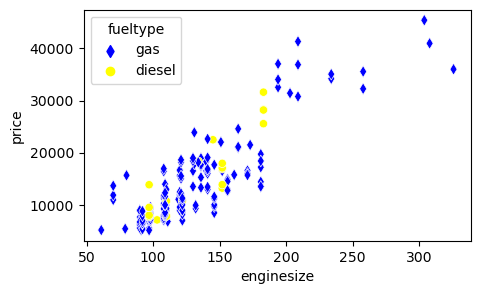

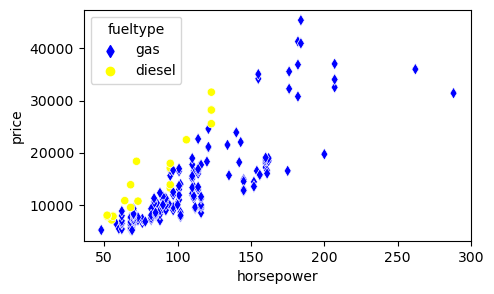

In [56]:
numeric_cols=data._get_numeric_data().columns
high_corr = data[numeric_cols].corr()['price'][data[numeric_cols].corr()['price'].abs()>0.8].index
for col in high_corr:
    if col!='price':
        plt.figure(figsize=(5,3))
        sns.scatterplot(data=data,
                        x=col,
                        y='price',
                        hue='fueltype',
                        style='fueltype',
                        markers=['d', 'o'],
                        palette=['blue', 'yellow'])
        plt.show()

In [57]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data[['horsepower', 'curbweight', 'enginesize']]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)


Mean Squared Error: 13140159.417056054
Mean Absolute Error: 2603.0171477324725
R-squared: 0.8057899887774891


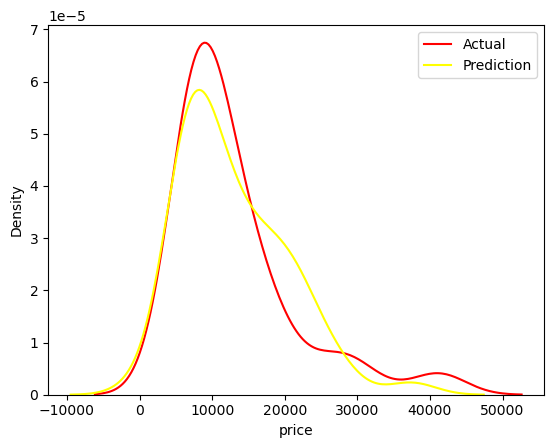

In [62]:
sns.kdeplot(y_test, label='Actual', color='red')
sns.kdeplot(y_pred, label='Prediction', color='yellow')
plt.legend();
plt.show()